## Purpose of this notebook:
### Mess around with the $\eta$ - $\phi$ data and see what their plots look like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from atlasgan import reco

# Current Understanding of Data Layout
First Axis: Each individual interaction (size usually: very large)<br>
Second Axis: $\eta$ values (size usually: 64)<br>
Third Axis: $\phi$ value (size usually: 64)<br>

In [2]:
# If you need to find the current working director (cwd) for data_path you can use this block of code to find it:
# import os
# cwd = os.getcwd()
# print(cwd)

data_path = "/home/wyattblair/towahid/mu20_normalized_train.npy"
data = np.load(data_path, mmap_mode='r')

# Wahid's draw_image function:
### Arguments:
• x: 2D numpy array to be plotted<br>
• vmin: float, minimum energy to clip at<br>
• vmax: float, maximum energy to clip at<br>
• xlabel: string, default=$\eta$<br>
• ylabel: string, default=$\phi$<br>
• draw_cbar: boolean, default=True, whether or not the color bar is drawn<br>
• ax: already existing axes (? <-- ask Wahid make sure that's right)<br>
• figize: tuple, figure size<br>

### Returns:
•Adds the image to the inputted axes

In [3]:
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

In [4]:
#Populate a list with 9 events from a chosen part of the data set (chosen via sample_seed)

sample_seed = 2
sample_events = []
for i in range(sample_seed, sample_seed+9):
    sample_events.append(data[i])

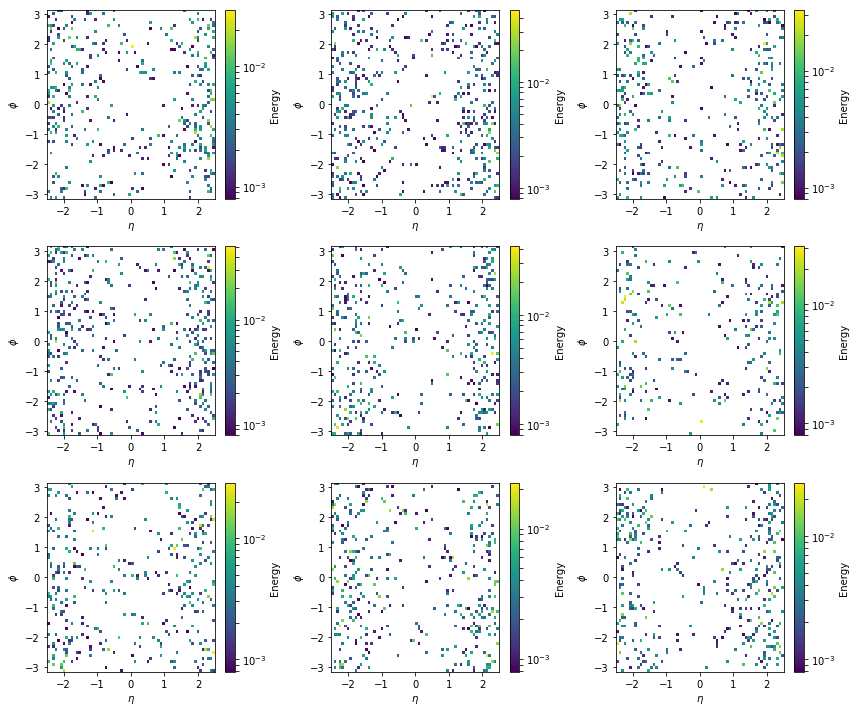

In [5]:
#Plot the events stored in sample_events using draw_image

fig, axs = plt.subplots(3,3, figsize=(12,10))
for i,ax in enumerate(axs.flatten()):
    draw_image(sample_events[i], ax=ax)
plt.tight_layout()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.0001, 1)

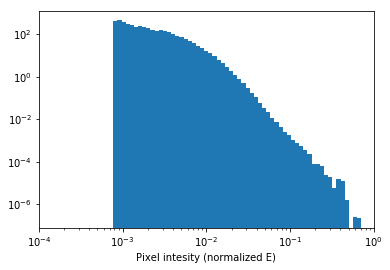

In [6]:
# Plot histogram of pixel intensities

plt.hist(data.flatten(),  bins=10**np.linspace(-4, -0.1, 80), normed=True,label='Validation');
plt.xlabel('Pixel intesity (normalized E)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10e-5,1)

# Now we're going to reconstruct some jets and plot their properties

The jets variable is a pandas dataframe, so you can use all of the helpful pandas functions on it

In [12]:
n_samples = 2**15

jets = reco.reconstruct_events(data)
print(type(jets))

<type 'list'>


In [14]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(9,6))

# # how many jets?
# jetCount = jets.groupby('event').size()
# ax1.hist(jetCount, bins=10, range=(0,10))
# ax1.set_xlabel('Number of Jets')

# # how many jets were at x transverse momentum?
# ax2.hist(jets.pt, bins=20, range=(200,2000))
# ax2.set_xlabel('Jet $p_t$ [GeV]')

print(len(jets))

0
